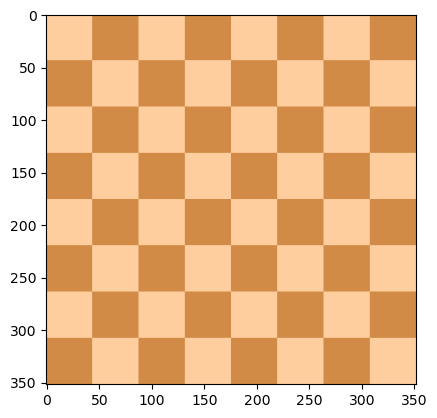

In [7]:
import matplotlib.pyplot as plt  #bazı algoritmalar  var mesela harris köşe  2 kenar var bunlar birleşince kenar çıkıyor 
%matplotlib inline
import numpy as np
import cv2
chess=cv2.imread(r"C:\Users\meric\Desktop\Computer-Vision-with-Python\DATA\flat_chessboard.png")
chess=cv2.cvtColor(chess,cv2.COLOR_BGR2RGB)
plt.imshow(chess)

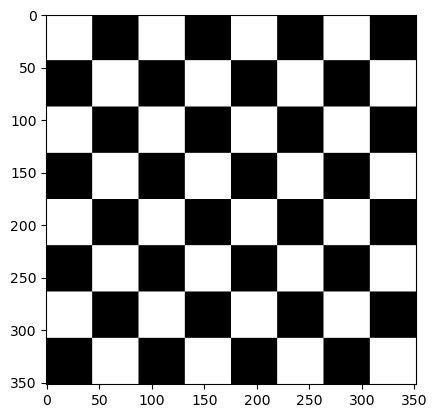

In [10]:

gchess=cv2.cvtColor(chess,cv2.COLOR_BGR2GRAY)
plt.imshow(gchess,cmap="gray")

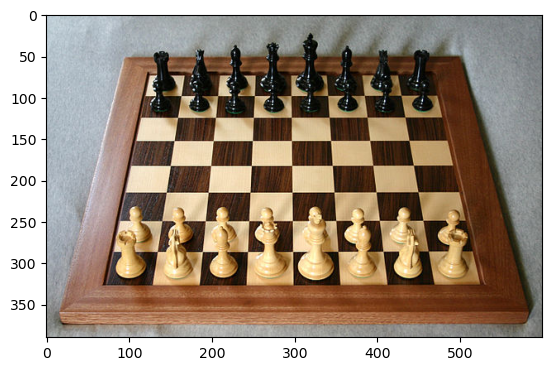

In [13]:
rchess=cv2.imread(r"C:\Users\meric\Desktop\Computer-Vision-with-Python\DATA\real_chessboard.jpg")
rchess=cv2.cvtColor(rchess,cv2.COLOR_BGR2RGB)
plt.imshow(rchess)

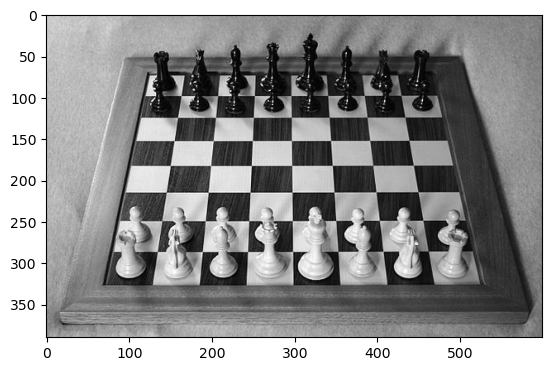

In [16]:
grchess=cv2.imread(r"C:\Users\meric\Desktop\Computer-Vision-with-Python\DATA\real_chessboard.jpg")
grchess=cv2.cvtColor(grchess,cv2.COLOR_BGR2GRAY)
plt.imshow(grchess,cmap="gray")

In [17]:
grchess

array([[206, 200, 198, ..., 118, 118, 123],
       [199, 196, 195, ..., 117, 115, 116],
       [209, 210, 208, ..., 129, 127, 127],
       ...,
       [120, 131, 144, ..., 116, 120, 119],
       [124, 143, 153, ..., 112, 113, 108],
       [135, 155, 156, ..., 114, 114, 107]], dtype=uint8)

In [18]:
gray=np.float32(grchess)

In [19]:
gray

array([[206., 200., 198., ..., 118., 118., 123.],
       [199., 196., 195., ..., 117., 115., 116.],
       [209., 210., 208., ..., 129., 127., 127.],
       ...,
       [120., 131., 144., ..., 116., 120., 119.],
       [124., 143., 153., ..., 112., 113., 108.],
       [135., 155., 156., ..., 114., 114., 107.]], dtype=float32)

In [ ]:
Neden np.float32 Kullanıyoruz?
Genellikle OpenCV'de görüntüler, piksel değerlerinin tam sayı (integer) olduğu 8-bit formatında saklanır.
Bu formatta piksel değerleri 0 ile 255 arasında olur:


Tam sayılar (uint8): Her piksel değeri tam sayı olarak temsil edilir, 
    yani her piksel değeri 0 (siyah) ile 255 (beyaz) arasında bir tam sayı değeri alır.
Ancak bazı görüntü işleme algoritmaları, özellikle hassas matematiksel işlemler (örneğin köşe algılama, Fourier dönüşümleri,
doğrusal dönüşümler), tam sayılarla sınırlı olmamak için kayan noktalı sayılara ihtiyaç duyar.
Bu yüzden görüntü verisini np.float32 tipine dönüştürürüz. Böylece piksel değerleri tam sayı yerine ondalık sayılarla 
ifade edilebilir ve daha hassas hesaplamalar yapılabilir.


Kayan Nokta Nedir?
Kayan nokta (floating point), bilgisayarlarda ondalık sayıları temsil etmek için kullanılan bir sayı türüdür. float32, 32 bitlik kayan nokta veri tipidir ve tam sayılara kıyasla çok daha hassas matematiksel işlemlere izin verir. Kayan nokta, tam sayılara göre şu avantajlara sahiptir:

Daha Hassas Sonuçlar:
Kesirli sayılar üzerinde işlemler yapabiliriz, bu da daha kesin sonuçlar verir.
Daha Geniş Sayı Aralığı: Daha geniş bir sayı aralığında işlem yapılmasına olanak sağlar, yani negatif ve pozitif 
çok büyük ya da çok küçük sayıları temsil edebiliriz.
Bu Durumda Neden Kullandık?
Genellikle bu dönüşüm, köşe algılama veya eşikleme gibi işlemlerden önce yapılır. Örneğin:

Harris köşe algılama: Köşe algılama gibi algoritmalar, görüntü üzerinde hassas matematiksel işlemler gerektirir
    . Bu algoritmalarda köşelerin tespit edilmesi için kayan nokta değerlerine ihtiyaç duyulur.
Diğer Algoritmalar: Özellikle Fourier dönüşümü, SIFT veya SURF gibi algoritmalar kayan nokta verisi gerektirir.
Bu satırda grchess adlı bir görüntüyü (gri tonlamalı bir satranç tahtası resmi gibi olabilir) 
kayan noktalı bir formata dönüştürüyoruz. Böylece görüntü üzerinde hassas işlemler yapmamız mümkün hale geliyor.

In [20]:
dst=cv2.cornerHarris(src=gray,blockSize=2,ksize=3,k=0.04)#block boyutu komşuluk boyutudur köşedeğerler ve özdeğerleri tespit eder 
#ksize açıklık parametresidir daha önce sobelx,sobely x y gradyandan bahsettik 

In [22]:
#optimum değer için bir eşik değer vardır ve bu değerin görüntüye bağlı olarak değişebilmesisir 
dst=cv2.dilate(dst,None)
rchess[dst>0.01*dst.max()]=[255,0,0] #RGB 

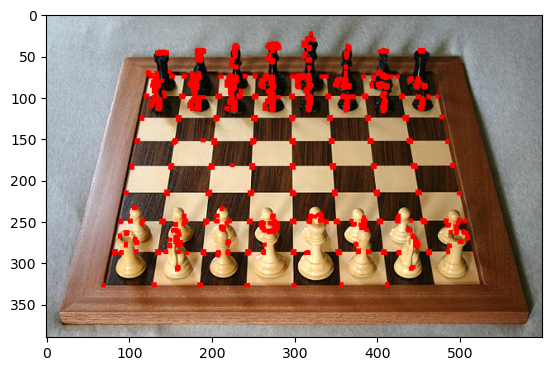

In [23]:
plt.imshow(rchess)

In [28]:
Bu satır, dst matrisine genişletme (dilation) işlemi uyguluyor.

Dilate (Genişletme) Nedir?

Genişletme işlemi, görüntüdeki parlak (beyaz) bölgeleri genişletmek için kullanılır.
Bu işlem, bir yapısal eleman (kernel) kullanarak, parlak noktaların çevresindeki piksellerin de parlak olmasını sağlar.
Genellikle köşe tespiti işlemi sonrası daha belirgin köşeler elde etmek amacıyla yapılır.
Bu genişletme, köşe noktalarının daha belirgin hale getirilmesi için kullanılır. Köşe tespiti sonrası bulunan köşeler bazen
çok küçük veya zayıf olabilir, bu yüzden genişletme işlemi uygulanarak bu köşeler daha net hale getirilir


cv2.dilate(dst, None) fonksiyonu, genişletme işlemini uygular:

dst: Harris köşe tespit algoritması sonucunda elde edilen köşe matrisidir.
None: Bu kısımda genişletme işleminde kullanılacak olan yapılandırma elemanı (kernel) verilmemiş, OpenCV varsayılan bir yapısal
eleman kullanıyor. Bu, genellikle 3x3 boyutunda bir kare şeklidir.
Özetle:
Bu satır, köşe tespiti sonucu elde edilen dst matrisinde bulunan köşeleri daha belirgin hale getirir.


2. rchess[dst > 0.01 * dst.max()] = [255, 0, 0]
Bu satırda, köşe noktalarını orijinal görüntü (rchess) üzerinde görselleştirmek için bir işlem yapılıyor.

Adım Adım İnceleme:
dst > 0.01 * dst.max():

dst: Harris köşe tespit algoritmasının sonucu olan bir matristir. Bu matris, her bir pikselde köşe olup olmadığını belirten 
bir yoğunluk değerine sahiptir.

dst.max(): dst matrisindeki en yüksek yoğunluk değerini alır. Bu değer, köşe tespiti algoritması tarafından 
tespit edilen en güçlü köşeye karşılık gelir.
0.01 * dst.max(): Bu, köşe tespiti sonucunda elde edilen en güçlü köşelerin %1'i kadar bir eşik değeridir. 
Yani sadece bu değerden daha büyük olan pikseller "güçlü köşe" olarak kabul edilecektir.
Bu işlem sonucunda, dst matrisinde köşe olan ve yoğunluğu belirlenen bu eşiğin üzerinde olan tüm pikseller True olur.

rchess[dst > 0.01 * dst.max()]:

Bu kısım, orijinal görüntü (rchess) üzerinde köşelerin tespit edildiği yerleri işaretlemeyi amaçlar.
rchess bir görüntü matrisidir ve bu satır, sadece dst matrisinde belirlenen köşe noktalarını işaretler.
Eğer dst matrisinde köşe noktası olduğu belirlenmişse, orijinal görüntünün o pikseli seçilir.

= [255, 0, 0]:

Tespit edilen köşe noktaları, rchess görüntüsünde kırmızı renkle işaretlenir. [255, 0, 0] RGB renk uzayında kırmızı anlamına gelir.
Böylece, tespit edilen köşeler görüntüde kırmızıya boyanır.
Özetle:
dst > 0.01 * dst.max() ifadesi ile köşe olan pikselleri belirliyoruz.
Sonra, orijinal görüntü (rchess) üzerinde bu pikselleri kırmızı ([255, 0, 0]) olarak boyuyoruz.
Bu sayede, görüntüde tespit edilen köşe noktaları görsel olarak kolayca fark edilebilir hale geliyor.
Genel Süreç:
Köşe Tespiti: Harris köşe algılama algoritması ile görüntüde köşe noktaları tespit edilir.
Genişletme: Tespit edilen köşeler genişletme işlemi ile daha belirgin hale getirilir.
Görselleştirme: Elde edilen köşe noktaları, orijinal görüntü üzerinde kırmızı renk ile işaretlenir.
Bu, köşe tespiti sonrası köşe noktalarını daha iyi görselleştirmeyi amaçlayan bir işlemdir.

IndexError: boolean index did not match indexed array along dimension 0; dimension is 352 but corresponding boolean dimension is 390

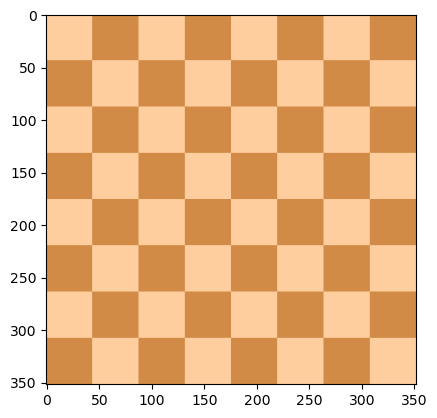

In [41]:
chess=cv2.imread(r"C:\Users\meric\Desktop\Computer-Vision-with-Python\DATA\flat_chessboard.png")
chess=cv2.cvtColor(chess,cv2.COLOR_BGR2RGB)
plt.imshow(chess)

In [ ]:
  #ilk parametre max köşe sayısı 5 koşeyi alacak 
#cler en iyi 5 köşeyi seçecek 2.si kalite seviyesi   şu  parametre değeri en iyi köşe kalitesiyle çarpılması 
#burada aşağıda artık köşelere daire çizcek harrise göre daha hızlı ve daha kolay parametre bulur ama 
# köşeleri harristeki gibi otomatik hedeflemez manuel kendimiz dairelerle yapmamız gerekir diziyi düzleştirme üzerine daireler ç.




In [42]:
corners = cv2.goodFeaturesToTrack(gchess,5,0.01,10)

In [43]:
corners = np.int0(corners)

C:\Users\meric\AppData\Local\Temp\ipykernel_14512\929114271.py:1: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  corners = np.int0(corners)


In [44]:
corners

array([[[308, 308]],

       [[264, 308]],

       [[220, 308]],

       [[176, 308]],

       [[132, 308]]], dtype=int64)

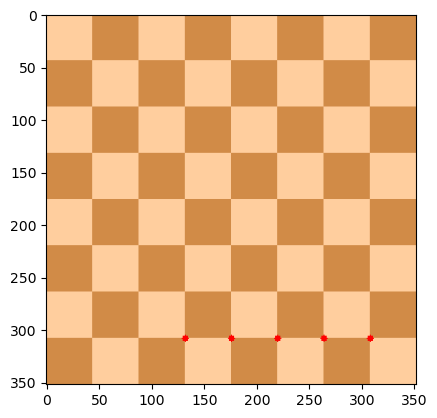

In [45]:
for i in corners:
    x,y = i.ravel()
    cv2.circle(chess,(x,y),3,255,-1)

plt.imshow(chess)

In [46]:
corners = cv2.goodFeaturesToTrack(gchess,64,0.01,10)

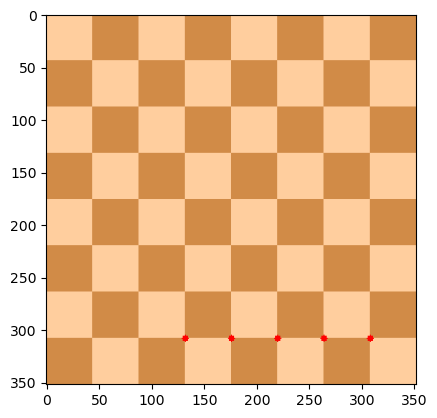

In [47]:
plt.imshow(chess)

C:\Users\meric\AppData\Local\Temp\ipykernel_14512\2986620004.py:1: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  corners = np.int0(corners)


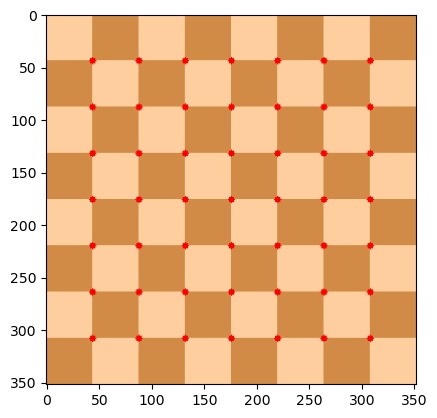

In [48]:
corners = np.int0(corners)
for i in corners:
    x,y = i.ravel()
    cv2.circle(chess,(x,y),3,255,-1)

plt.imshow(chess)

In [ ]:
 corners = np.int0(corners)
Bu satır, tespit edilen köşe noktalarının tipini tamsayıya (integer) dönüştürüyor.

Neden Yapılıyor?
cv2.goodFeaturesToTrack() fonksiyonundan dönen corners dizisi kayan noktalı (floating point) sayılar içerir. Ancak görüntü işlemede piksel koordinatları tam sayı olmalıdır, çünkü bir pikselin 3.7 gibi kesirli bir konumda olamaz.
np.int0 fonksiyonu, dizinin içindeki tüm elemanları tamsayıya (int) dönüştürür. np.int0, np.int32 ile aynıdır ve her değeri yuvarlayarak tamsayı haline getirir.
Bu sayede, köşe noktalarının (x, y) koordinatları tam sayılara dönüştürülür ve görüntü üzerinde kullanılmaya hazır hale getirilir.

2. for i in corners:
Bu satır, corners dizisindeki her köşe noktası için bir döngü başlatır.

Ne Yapar?
corners: Tespit edilen köşe noktalarının listesidir. Her eleman, bir köşe noktasının koordinatlarını (x, y) içerir.
Bu döngü, her köşe noktası için tekrarlanır ve her köşe noktası üzerinde işlem yapılır.
3. x, y = i.ravel()
Bu satırda, her köşe noktasının x ve y koordinatları elde ediliyor.

Açıklama:
i: Her bir köşe noktasının koordinatlarını (x, y) içeren bir dizi (örneğin: [[x, y]]).
ravel(): Bu fonksiyon, çok boyutlu bir diziyi tek boyutlu hale getirir.
Örneğin, [[x, y]] şeklinde bir dizi varken, bunu ravel() kullanarak [x, y] şekline getiriyoruz.
Sonuç olarak, her bir köşe noktasının x ve y koordinatları elde edilir.
Örnek:

Eğer i = [[150, 200]] ise, i.ravel() bunu [150, 200] haline getirir. Ardından x = 150 ve y = 200 olarak atanır.
4. cv2.circle(chess, 

C:\Users\meric\AppData\Local\Temp\ipykernel_14512\3815564354.py:6: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  corners = np.int0(corners)


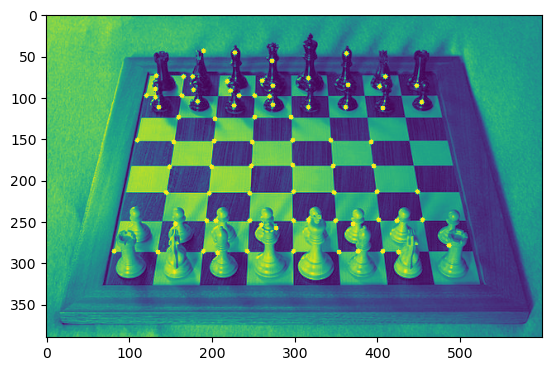

In [49]:
rchess=cv2.imread(r"C:\Users\meric\Desktop\Computer-Vision-with-Python\DATA\real_chessboard.jpg")
rchess=cv2.cvtColor(rchess,cv2.COLOR_BGR2RGB)
plt.imshow(rchess)
rchess = cv2.cvtColor(rchess,cv2.COLOR_BGR2GRAY)
corners = cv2.goodFeaturesToTrack(rchess,80,0.01,10)
corners = np.int0(corners)

for i in corners:
    x,y = i.ravel()
    cv2.circle(rchess,(x,y),3,255,-1)

plt.imshow(rchess)